# Interact Exercise 3

## Imports

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [4]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.display import display

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Using interact for animation with data

A [*soliton*](http://en.wikipedia.org/wiki/Soliton) is a constant velocity wave that maintains its shape as it propagates. They arise from non-linear wave equations, such has the [Korteweg–de Vries](http://en.wikipedia.org/wiki/Korteweg%E2%80%93de_Vries_equation) equation, which has the following analytical solution:

$$
\phi(x,t) = \frac{1}{2} c \mathrm{sech}^2 \left[ \frac{\sqrt{c}}{2} \left(x - ct - a \right) \right]
$$

The constant `c` is the velocity and the constant `a` is the initial location of the soliton.

Define `soliton(x, t, c, a)` function that computes the value of the soliton wave for the given arguments. Your function should work when the postion `x` *or* `t` are NumPy arrays, in which case it should return a NumPy array itself.

In [5]:
def soliton(x, t, c, a):
    """Return phi(x, t) for a soliton wave with constants c and a."""
    if type(x) or type(t) == np.array:
        answer = np.array(0.5 * c/(np.cosh(np.sqrt(c)/2*(x-c*t-a)))**2)
    else:
        answer = 0.5 * c/(np.cosh(np.sqrt(c)/2*(x-c*t-a)))
    return answer

In [6]:
assert np.allclose(soliton(np.array([0]),0.0,1.0,0.0), np.array([0.5]))

To create an animation of a soliton propagating in time, we are going to precompute the soliton data and store it in a 2d array. To set this up, we create the following variables and arrays:

In [7]:
tmin = 0.0
tmax = 10.0
tpoints = 100
t = np.linspace(tmin, tmax, tpoints)

xmin = 0.0
xmax = 10.0
xpoints = 200
x = np.linspace(xmin, xmax, xpoints)

c = 1.0
a = 0.0

Compute a 2d NumPy array called `phi`:

* It should have a dtype of `float`.
* It should have a shape of `(xpoints, tpoints)`.
* `phi[i,j]` should contain the value $\phi(x[i],t[j])$.

In [8]:
phi = np.ndarray(shape=(xpoints,tpoints), dtype = float)
for i in x:
    for j in t:
        phi[i,j] = soliton(x[i],t[j],c,a)




In [9]:
assert phi.shape==(xpoints, tpoints)
assert phi.ndim==2
assert phi.dtype==np.dtype(float)
assert phi[0,0]==soliton(x[0],t[0],c,a)

Write a `plot_soliton_data(i)` function that plots the soliton wave $\phi(x, t[i])$. Customize your plot to make it effective and beautiful.

In [10]:
def plot_soliton_data(i=0):
    """Plot the soliton data at t[i] versus x."""
    plt.plot(soliton(x,t[i],c,a))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.axes.get_yaxis().tick_left()
    plt.title('Soliton Wave')
    plt.xlabel('X')
    plt.ylabel('Psi(x,t)')

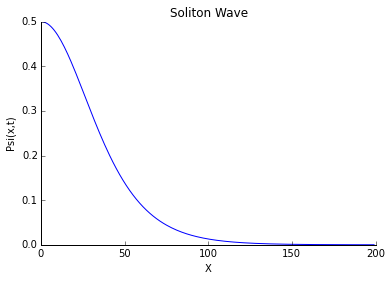

In [11]:
plot_soliton_data(0)

In [12]:
assert True # leave this for grading the plot_soliton_data function

Use `interact` to animate the `plot_soliton_data` function versus time.

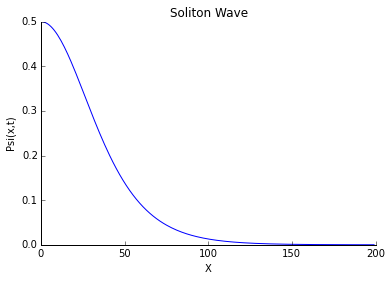

In [13]:
interact(plot_soliton_data,i = (0,50))

In [14]:
assert True # leave this for grading the interact with plot_soliton_data cell